In [1]:
#Mount the Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
####Env Setting
#You may run this only once
"""
%cd /content/drive/MyDrive/calvinoffon
!git clone https://github.com/mees/calvin_env.git
%cd /content/drive/MyDrive/calvinoffon/calvin_env
!git clone https://github.com/lukashermann/tacto.git
"""

'\n%cd /content/drive/MyDrive/calvinoffon\n!git clone https://github.com/mees/calvin_env.git\n%cd /content/drive/MyDrive/calvinoffon/calvin_env\n!git clone https://github.com/lukashermann/tacto.git\n'

In [3]:
# Install packages
%cd /content/drive/MyDrive/calvinoffon/calvin_env/tacto/
!pip3 install -e .
%cd /content/drive/MyDrive/calvinoffon/calvin_env
!pip3 install -e .
!pip3 install -U numpy
!pip install sentence_transformers

/content/drive/MyDrive/calvinoffon/calvin_env/tacto
Obtaining file:///content/drive/MyDrive/calvinoffon/calvin_env/tacto
  Preparing metadata (setup.py) ... done
  Cloning https://github.com/mmatl/pyopengl.git (to revision 76d1261adee2d3fd99b418e75b0416bb7d2865e6) to /tmp/pip-install-9a6mbuno/pyopengl_5b871b7fe9c748c6bc552431c8acd9d0
  Running command git clone --filter=blob:none --quiet https://github.com/mmatl/pyopengl.git /tmp/pip-install-9a6mbuno/pyopengl_5b871b7fe9c748c6bc552431c8acd9d0
  Running command git rev-parse -q --verify 'sha^76d1261adee2d3fd99b418e75b0416bb7d2865e6'
  Running command git fetch -q https://github.com/mmatl/pyopengl.git 76d1261adee2d3fd99b418e75b0416bb7d2865e6
  Resolved https://github.com/mmatl/pyopengl.git to commit 76d1261adee2d3fd99b418e75b0416bb7d2865e6
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 103.2/103.2 MB 9.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.5/79.5 kB 11.3 MB/s eta 0:00:0

/content/drive/MyDrive/calvinoffon/calvin_env
Obtaining file:///content/drive/MyDrive/calvinoffon/calvin_env
  Installing build dependencies ... done
  Checking if build backend supports build_editable ... done
  Getting requirements to build editable ... done
  Preparing editable metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 1.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 195.8/195.8 kB 11.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 7.6 MB/s eta 0:00:00
  Building editable for calvin_env (pyproject.toml) ... done
  Created wheel for calvin_env: filename=calvin_env-0.0.1-0.editable-py3-none-any.whl size=3751 sha256=8c5b80b53230c8acd4824835e8526f4e62e3d8f4ad9160eb2ae7904433341860
  Stored in directory: /tmp/pip-ephem-wheel-cache-lufdsq_9/wheels/99/86/68/3c578893db74f985649cc8358079b3de15b7ef148845a4b926
Successfully built calvin_env
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18

In [ ]:
# Run this to check if the installation was succesful
%cd /content/drive/MyDrive/calvinoffon/calvin_env
from calvin_env.envs.play_table_env import PlayTableSimEnv
# 안되면 런타임 세션 다시시작 후, 이 셀부터 다시 실행

/content/drive/MyDrive/calvinoffon/calvin_env


AttributeError: module 'numpy.linalg._umath_linalg' has no attribute '_ilp64'

In [ ]:
###데이터셋 /calvinoffon/calvin_env/dataset/에 저장
### dataset 폴더 없으면 !mkdir /content/drive/MyDrive/calvinoffon/calvin_env/dataset
###한번만 실행
#
#%cd /content/drive/MyDrive/calvinoffon/
#from dataset.calvin_rezip import dataset_rezip
#dataset_rezip(data_path="/content/drive/MyDrive/calvinoffon/calvin_env/dataset/calvin_debug_dataset/training",
#             save_path='./data',
#             file_name='training')

In [ ]:
%cd /content/drive/MyDrive/calvinoffon
from dataset.calvin_dataset import CALVIN_dataset
training_dataset = CALVIN_dataset('./data/training.npz')

/content/drive/MyDrive/calvinoffon


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


In [ ]:
print(training_dataset.lang_emb.shape)
print(training_dataset.reduced_lang_emb.shape)
print(training_dataset.data[0]['prior'][0])
print(training_dataset.data[0]['prior'][20])
print(training_dataset.data[0]['prior'][63])
print(training_dataset.data[0]['prior'].shape)
training_dataset.get_task_id(training_dataset.task[0])

(34, 384)
(34, 200)
[0.02661881 0.03104359 0.02202301 0.02647914 0.02213198 0.02607328
 0.02254911 0.02606621 0.01879841 0.02290635 0.02197839 0.02523982
 0.16582419 0.15104495 0.01952992 0.01693269 0.0212581  0.01599038
 0.0189829  0.04331944 0.03304804 0.03609627 0.01243307 0.01045555
 0.01079733 0.02190223 0.00951532 0.01546222 0.00436834 0.00362734
 0.01639482 0.01814011 0.03059107 0.0323776 ]
[2.94767830e-06 8.29400842e-06 8.23617932e-07 2.84517346e-06
 8.51426818e-07 2.56436227e-06 9.65387292e-07 2.55968579e-06
 2.83905026e-07 1.07306605e-06 8.12457378e-07 2.06090845e-06
 6.51934627e-01 3.47904427e-01 3.67037048e-07 1.40532787e-07
 6.49297274e-07 9.56056525e-08 3.03184891e-07 7.80380994e-05
 1.26350170e-05 2.28744611e-05 1.75913679e-08 5.48501592e-09
 6.81020075e-09 7.93703355e-07 2.90982492e-09 7.62691957e-08
 1.54614929e-11 4.42741729e-12 1.13100016e-07 2.23369365e-07
 7.51383073e-06 1.10076357e-05]
[1.08694442e-322 1.25424183e-295 0.00000000e+000 1.48219694e-323
 0.00000000e+0

12

In [ ]:
?##데이터셋 잘 로드 되는지 확인
%cd /content/drive/MyDrive/calvinoffon
from dataset.calvin_dataset import CALVIN_dataset
training_dataset = CALVIN_dataset('./data/training.npz')
!python dataset/calvin_dataset.py
from torch.utils.data import DataLoader
batch_size = 16
train_data_loader = DataLoader(dataset=training_dataset, batch_size=16,shuffle=True)

Object `##데이터셋 잘 로드 되는지 확인` not found.
/content/drive/MyDrive/calvinoffon


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/229 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/122 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/3.73k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/314 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
REWARD
tensor([[ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
          0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
          0,  0,  0,  0,  0,  0,  0,  0, 10,  0,  0,  0,  0,  0,  0,  0,  0,  0,
          0,  0,  0,  0,  0,  0,  0,  0,  0],
        [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
          0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, 10,  0,
          0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
          0,  0,  0,  0,  0,  0,  0,  0,  0]])
TASK ID
tensor([ 6, 33])


In [5]:
##Offline Setting
%cd /content/drive/MyDrive/calvinoffon
!python offline_train_script.py --cuda --reduction_dim=39 --policy=Deterministic --batch_size=8 --epochs=20

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/content/drive/MyDrive/calvinoffon
2024-05-26 17:33:51.561965: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-05-26 17:33:51.562028: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-05-26 17:33:51.564096: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-05-26 17:33:51.576882: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-05-26 17:33:5

In [ ]:
##Offline Setting
%cd /content/drive/MyDrive/calvinoffon
!python online_train_script.py --cuda

/content/drive/MyDrive/calvinoffon
2024-05-25 18:14:21.983724: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-05-25 18:14:21.983776: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-05-25 18:14:21.985272: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-05-25 18:14:21.992960: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
Traceback (most re

KeyboardInterrupt: 

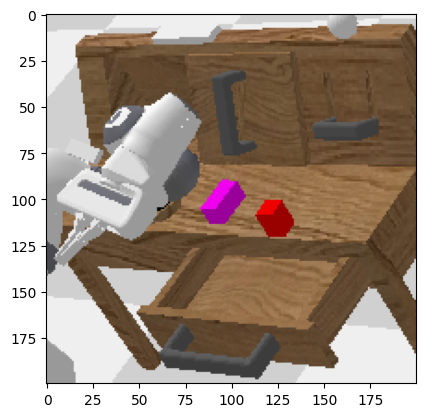

In [7]:
%cd /content/drive/MyDrive/calvinoffon
from dataset.calvin_dataset import CALVIN_dataset
# 저장된 SAC 불러오는 것 구현해야함 지금 구현된건 Random Policy
from easydict import EasyDict
args = EasyDict()
args.gamma = 0
args.tau = 0
args.lr = 0
args.alpha = 0
args.automatic_entropy_tuning = False
args.target_update_interval = 1
args.seed = 123456
args.cuda = True
args.hidden_size =256
args.n_tasks=34
args.reduction_dim=39
args.temp=0.5
args.policy = 'Deterministic'


import time
import hydra
import numpy as np
import os
import torch
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt
from IPython import display

import sys
sys.path.append("./language_soft_actor_critic")
sys.path.append("/content/drive/MyDrive/calvinoffon/calvin_env")

##Evaluation Code
eval_dataset = np.load('./data/training.npz',allow_pickle=True)['arr_0']
train_dataset = CALVIN_dataset('./data/training.npz')


##Retrieve agent : agent=torch.load(')

##Environment init
import hydra
from hydra import initialize, compose

with initialize(config_path="./calvin_env/conf/"):
  cfg = compose(config_name="config_data_collection.yaml", overrides=["cameras=static_and_gripper"])
  cfg.env["use_egl"] = False
  cfg.env["show_gui"] = False
  cfg.env["use_vr"] = False
  cfg.env["use_scene_info"] = True
  cfg.env['control_freq'] = 30
  print(cfg.env)

import custom_calvin_env as calvin

new_env_cfg = {**cfg.env}
new_env_cfg["tasks"] = cfg.tasks
new_env_cfg.pop('_target_', None)
new_env_cfg.pop('_recursive_', None)
env = calvin.Custom_Calvin_Env(sparse_reward_val=10,**new_env_cfg)

env.reset()

from language_soft_actor_critic import off2on_sac
####argument pass in Colab

agent =off2on_sac.Off2On_SAC(39,384,39,torch.zeros((34, 39)),env.action_space,args)
agent.load_checkpoint('./checkpoints/sac_checkpoint_calvin_', evaluate=True)
for epi_idx in np.random.permutation(len(eval_dataset)):
  episode = eval_dataset[epi_idx]

  language_embedding = torch.tensor(episode['emb'].reshape(1,-1))
  init_robot_obs = episode['robot_obs'][0,:]
  init_scene_obs = episode['scene_obs'][0,:]
  task = episode['task']
  ##task idx
  task_id = train_dataset.get_task_id(task)

  observation = env.reset(scene_obs=init_scene_obs,robot_obs=init_robot_obs)
  max_epi_length = 64

  curr_epi_length = 0
  done = False
  while not done and curr_epi_length < max_epi_length:
    #print(observation['robot_obs'].shape)
    #print(observation['scene_obs'].shape)
    #print(language_embedding.shape)
    #print(np.concatenate([observation['robot_obs'],observation['scene_obs']]).shape)
    state = np.concatenate([observation['robot_obs'],observation['scene_obs']]).reshape(1,-1)

    action = agent.select_action(observation,torch.tensor(task_id).unsqueeze(0))
    if(action[-1]>0):
      action[-1]=1
    else:
      action[-1]=-1

    print(action)

    observation, reward, done, info = env.step(action)
    #The observation is given as a dictionary with different values
    rgb = env.render(mode="rgb_array")[:,:,:]#::-1
    display.clear_output(wait=True)
    display.display(plt.gcf())
    print(f"Current Task - {task}")
    plt.imshow(rgb)
    curr_epi_length += 1

In [ ]:
import torch
B,L,D = 8,16,4
cont_s = torch.randn((B,L,D))

In [ ]:
t = torch.randint(L - 1, (B, 1, 1)).to(cont_s.device) + 1
t.repeat(1, 1, D).shape

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


torch.Size([8, 1, 4])

In [ ]:
cont_s_t = torch.gather(cont_s, dim=1, index=t.repeat(1, 1, D)).squeeze(1)
cont_s_t.shape

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


torch.Size([8, 4])

In [ ]:
cont_s[:,0, :]

tensor([[ 0.2531,  0.2099,  0.1863, -1.2824],
        [-1.1164,  0.1489, -0.4610,  0.9713],
        [ 0.8448, -0.0685, -1.5391, -0.2438],
        [ 0.0650,  0.6692, -0.6032, -1.5702],
        [ 0.8334, -0.9097,  1.3211,  1.3283],
        [-0.1267, -0.1951, -1.2389, -0.8429],
        [-1.8965, -0.1351,  0.1759,  1.3949],
        [-0.5812, -0.0673, -1.1834, -1.5331]])

In [ ]:

cont_s_t = torch.gather(x, dim=1, index=t.repeat(1, 1, self.skill_dim)).squeeze(1)
dist = (x[:, 0, :].unsqueeze(1) - x_goal.unsqueeze(0)).pow(2).sum(-1)

log_p = F.log_softmax(-dist, dim=1)
weights = (self.gamma ** t).view(-1)

contrastive_loss = -(weights * torch.diagonal(log_p)).mean()

In [ ]:
a=torch.tensor([1,2,3])
b=torch.ones(3,3)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
a*b

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


tensor([[1., 2., 3.],
        [1., 2., 3.],
        [1., 2., 3.]])

In [ ]:
import numpy as np
lang_embeddings = np.load("/content/drive/MyDrive/calvinoffon/calvin_env/dataset/calvin_debug_dataset/validation/lang_annotations/embeddings.npy", allow_pickle= True).item()

In [ ]:
lang_embeddings['rotate_blue_block_left']

{'emb': array([[[-1.06329627e-01, -7.44461715e-02,  3.55048031e-01,
           1.00360550e-01,  2.11997554e-01,  1.16888992e-01,
           1.44572183e-01,  6.01994880e-02,  7.31197298e-02,
          -3.04172765e-02,  2.61122230e-02,  6.78571701e-01,
          -2.14459077e-01, -1.45312980e-01, -1.79476086e-02,
           1.80627391e-01, -1.75898090e-01,  5.25159299e-01,
          -4.22955155e-02,  2.26572514e-01,  2.78121859e-01,
           6.32916391e-03,  2.20218301e-01,  4.37211037e-01,
          -1.09677382e-01, -1.64103016e-01,  8.45907107e-02,
          -5.54025531e-01, -6.69558858e-03, -1.85354948e-01,
          -2.94408444e-02,  1.78558812e-01, -6.91692829e-02,
          -2.18807552e-02, -9.37520713e-03, -3.80563974e-01,
          -4.67041999e-01,  2.79165804e-01,  1.00982092e-01,
          -2.27490980e-02, -1.28087342e-01,  3.72483321e-02,
           2.41268635e-01,  6.00493066e-02, -2.38972623e-02,
           2.59271711e-01,  3.93350989e-01,  4.84722070e-02,
           4.8047

In [ ]:
import numpy as np
a = np.array([1,2,3])

In [ ]:
2**a

array([2, 4, 8])